<a href="https://colab.research.google.com/github/w-okada/voice-changer/blob/dev/SOFT_VC_FLASK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch, torchaudio
import requests
import IPython.display as display

In [26]:
#!apt-get install -y espeak libsndfile1-dev
!pip install flask
# !pip install python-socketio
# !pip install eventlet
# !pip install unidecode
# !pip install phonemizer
# !pip install retry
!pip install flask_cors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
# hubert = torch.hub.load("bshall/hubert:main", "hubert_soft").cuda()
# acoustic = torch.hub.load("bshall/acoustic-model:main", "hubert_soft").cuda()
# hifigan = torch.hub.load("bshall/hifigan:main", "hifigan_hubert_soft").cuda()

In [28]:
# with open("example.wav", "wb") as file:
#   response = requests.get("https://drive.google.com/uc?export=preview&id=1Y3KuPAhB5VcsmIaokBVKu3LUEZOfhSu8")
#   file.write(response.content)

In [29]:
# source, sr = torchaudio.load("emotion059.wav")
# source = torchaudio.functional.resample(source, sr, 16000)
# source = source.unsqueeze(0).cuda()

In [30]:
# with torch.inference_mode():
#     # Extract speech units
#     units = hubert.units(source)
#     # Generate target spectrogram
#     mel = acoustic.generate(units).transpose(1, 2)
#     # Generate audio waveform
#     target = hifigan(mel)

In [31]:
# display.Audio(target.squeeze().cpu(), rate=16000)

In [32]:
# data = target.squeeze().cpu()

In [33]:
# display.Audio(data, rate=16000)

In [34]:
# dest = torchaudio.functional.resample(target, 16000,24000)

In [35]:
# display.Audio(dest.squeeze().cpu(), rate=24000)

In [36]:
# dest

In [37]:
# (3) リポジトリのクローン
!git clone https://github.com/w-okada/voice-changer.git
%ls voice-changer/frontend/dist


fatal: destination path 'voice-changer' already exists and is not an empty directory.
assets/      favicon.ico*  index.js*
coffee.png*  index.html*   index.js.LICENSE.txt*


In [38]:
# (4-1) 設定ファイルの配置
!cp voice-changer/template/setting_colab.json voice-changer/frontend/dist/assets/setting.json


In [39]:
# (6-1) サーバの起動
PORT=8087
get_ipython().system_raw(f'python3 serverFlask.py {PORT} >foo 2>&1 &')

In [43]:
# (6-2) サーバの起動確認 (Ctrl+Retで実行)
!cat foo

Using cache found in /root/.cache/torch/hub/bshall_hubert_main
Using cache found in /root/.cache/torch/hub/bshall_acoustic-model_main
Using cache found in /root/.cache/torch/hub/bshall_hifigan_main
[2022-09-15 08:22:01,380] INFO in serverFlask: INITIALIZE MODEL
[2022-09-15 08:22:01,380] INFO in serverFlask: START APP
Removing weight norm...
 * Serving Flask app "serverFlask" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on
Traceback (most recent call last):
  File "serverFlask.py", line 108, in <module>
    app.run(debug=True, host='0.0.0.0',port=PORT)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 990, in run
    run_simple(host, port, self, **options)
  File "/usr/local/lib/python3.7/dist-packages/werkzeug/serving.py", line 1030, in run_simple
    s.bind(server_address)
OSError: [Errno 98] Address already in use


In [24]:
# (7) プロキシを起動
from google.colab import output

output.serve_kernel_port_as_window(PORT)

<IPython.core.display.Javascript object>

In [44]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import torch, torchaudio
import IPython.display as display

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


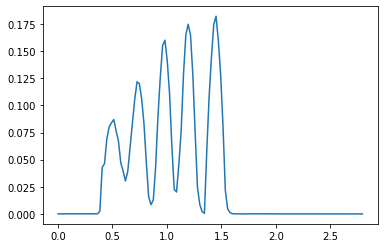

In [48]:
wave, sr = librosa.load("received_data.wav", sr=24000)
rms = librosa.feature.rms(y=wave)
times = librosa.times_like(rms, sr=sr)
plt.plot(times, rms[0]*2**(1/2))
volume_db = 20 * np.log10(wave) 


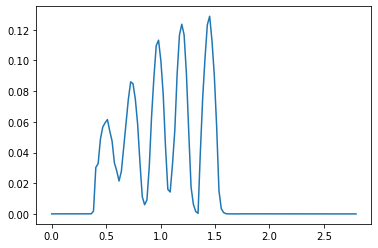

In [54]:
plt.plot(times, rms[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


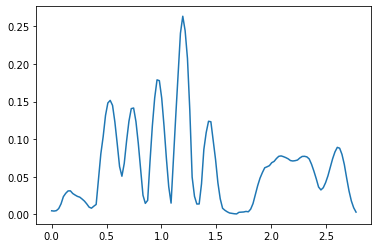

In [46]:
wave, sr = librosa.load("converted_data.wav", sr=24000)
rms = librosa.feature.rms(y=wave)
times = librosa.times_like(rms, sr=sr)
plt.plot(times, rms[0]*2**(1/2))
volume_db = 20 * np.log10(wave) 


In [55]:
times

array([0.        , 0.02133333, 0.04266667, 0.064     , 0.08533333,
       0.10666667, 0.128     , 0.14933333, 0.17066667, 0.192     ,
       0.21333333, 0.23466667, 0.256     , 0.27733333, 0.29866667,
       0.32      , 0.34133333, 0.36266667, 0.384     , 0.40533333,
       0.42666667, 0.448     , 0.46933333, 0.49066667, 0.512     ,
       0.53333333, 0.55466667, 0.576     , 0.59733333, 0.61866667,
       0.64      , 0.66133333, 0.68266667, 0.704     , 0.72533333,
       0.74666667, 0.768     , 0.78933333, 0.81066667, 0.832     ,
       0.85333333, 0.87466667, 0.896     , 0.91733333, 0.93866667,
       0.96      , 0.98133333, 1.00266667, 1.024     , 1.04533333,
       1.06666667, 1.088     , 1.10933333, 1.13066667, 1.152     ,
       1.17333333, 1.19466667, 1.216     , 1.23733333, 1.25866667,
       1.28      , 1.30133333, 1.32266667, 1.344     , 1.36533333,
       1.38666667, 1.408     , 1.42933333, 1.45066667, 1.472     ,
       1.49333333, 1.51466667, 1.536     , 1.55733333, 1.57866

/usr/local/lib/python3.7/dist-packages/torchaudio/functional/functional.py:540: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  "At least one mel filterbank has all zero values. "


Shape of spectrogram: torch.Size([1, 128, 835])


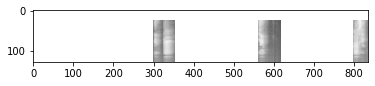

In [4]:
source, sr = torchaudio.load("received_data.wav")
specgram = torchaudio.transforms.MelSpectrogram(sample_rate=24000)(source)
print("Shape of spectrogram: {}".format(specgram.size()))
plt.figure()
p = plt.imshow(specgram.log2()[0,:,:].detach().numpy(), cmap='gray')

Shape of spectrogram: torch.Size([1, 128, 833])


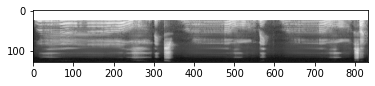

In [5]:
source, sr = torchaudio.load("converted_data.wav")
specgram = torchaudio.transforms.MelSpectrogram(sample_rate=24000)(source)
print("Shape of spectrogram: {}".format(specgram.size()))
plt.figure()
p = plt.imshow(specgram.log2()[0,:,:].detach().numpy(), cmap='gray')

In [115]:
source, sr = torchaudio.load("received_data.wav")
# window = torch.hann_window(window_length=400).cuda()
# pitch = torchaudio.transforms.PitchShift(sample_rate=24000, n_steps=12, window=window)(source.cuda())
source = source.cuda()
chunks = torch.split(source,24000,1)
chunks = [torchaudio.transforms.Vol(i*3)(c) for i, c in enumerate(chunks)]
r = torch.cat(chunks,1)
# pitch = torchaudio.transforms.Vol(1)(source)
#pitch = torchaudio.transforms.Vol(3)(torch.split(source, 36000,1)[0])

torchaudio.save("pitach.wav", r.cpu(), 24000)


In [113]:
len(chunks), len(r)

(6, 1)

In [89]:
len(t), len(source[0])

(16768, 67072)

In [116]:
display.Audio("pitach.wav", rate=24000)

In [111]:
display.Audio("received_data.wav", rate=24000)